# Introduction to Data Science

<br/>
<br/>

# ***Raw Data***

<br/>

1. [Setup](#0)<br>
2. [Raw Data](#I)<br>
3. [Merge continent column](#III)<br>
4. [Data in "long" format](#IV)<br>
5. [Data in "wide" format](#V)<br>

In [1]:
import os
import pandas as pd
import numpy as np

## 1. [Setup](#0)
<a id="0"></a>
<br/>

To see where is the *current working directory* for this specific `jupyter notebook` we leverage the method `getcwd()` from package `os`

In [2]:
import os
while not os.getcwd().endswith("IntroDS"):
    os.chdir("..")

os.getcwd()

'C:\\Users\\eduardo.garcia\\Documents\\Github\\IntroDS'

*Current directory* of a specific `jupyter notebook` is usually originally set to where the file is stored. Remember that it is possible to change our *current working directory* by leveraging the method `chdir()` from the package `os`. 

The `while` loop above will *check* if the ending string returned by `os.getcwd()` is equal to "IntroDS", while this condition it will keep going one folder backwards.

**IntroDS** is the name of the folder we have created for this workshop. The structure of it is as follows:

+ data
    + Data_Extract_From_World_Development_Indicators.xlsx
    + chave_continentes_paises.csv
    + WorldBankDataReshaped.csv
    + WorldBankDataPanel.xlsx
+ materials
    + IntroDSPart1.html
    + background.png
    + WorkshopPowerBI.pdf
+ images
    + DSKC_logo.png
+ metadata
    + Expense.xlsx
    + Final Consumption Expenditure.xlsx
    + Militar Expenditure.xlsx
+ notebooks
    + solved
        + 0_TransformRawData.ipynb
        + 1_DataManipulation.ipynb
    + IntroDSPart1.ipynb
    + IntroDSPart2.ipynb
      
+ README.md
    
   
Whenever new material is released I will be sharing it via the following github [repo](https://github.com/EduardoHidalgoGarcia/IntroDS).

## 2. [Raw Data](#II)
<a id="II"></a>
<br/>

Usually raw data is not present at the data source in the same format we may need for our analysis. In most case a data scientist expend most of its time cleaning and "putting into format" the raw data.

Below we leverage `pandas` module (presented on the first part of the series) to perform the required transformations.

Import the data from the file: `Data_Extract_From_World_Development_Indicators.xlsx`. Note that it is located at a subfolder within the repo named `data`. Assign it to the name `df` and display the first 3 rows of it.

In [3]:
df = pd.read_excel("data\\Data_Extract_From_World_Development_Indicators.xlsx",index_col=False)
df.head(3)

,Country Name,Country Code,Series Name,Series Code,2000 [YR2000],2001 [YR2001],2002 [YR2002],2003 [YR2003],2004 [YR2004],2005 [YR2005],...,2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020]
0,Australia,AUS,Access to electricity (% of population),EG.ELC.ACCS.ZS,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,..,..
1,Australia,AUS,Account ownership at a financial institution o...,FX.OWN.TOTL.ZS,..,..,..,..,..,..,...,99.064842,..,..,98.859566,..,..,99.519371,..,..,..
2,Australia,AUS,Account ownership at a financial institution o...,FX.OWN.TOTL.FE.ZS,..,..,..,..,..,..,...,98.592285,..,..,99.036232,..,..,99.195091,..,..,..


Note that in the raw data columns four and onwards refer to the year and that the column name has a duplicated chain of strings. For example, in the 4th column the name is `2000 [YR200]`, can you think on an instruction to convert all those column names into something of the shape `2000`? 

In [5]:
df.rename(columns=dict(zip(list(df.columns[4:]),[x.split()[0] for x in list(df.columns)[4:]])),inplace=True)

In [7]:
df.drop(columns=['Series Code'],inplace=True)

In [12]:
df.head(10)

,Country Name,Country Code,Series Name,2000,2001,2002,2003,2004,2005,2006,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Australia,AUS,Access to electricity (% of population),100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,..,..
1,Australia,AUS,Account ownership at a financial institution o...,..,..,..,..,..,..,..,...,99.064842,..,..,98.859566,..,..,99.519371,..,..,..
2,Australia,AUS,Account ownership at a financial institution o...,..,..,..,..,..,..,..,...,98.592285,..,..,99.036232,..,..,99.195091,..,..,..
3,Australia,AUS,Account ownership at a financial institution o...,..,..,..,..,..,..,..,...,99.594696,..,..,98.670578,..,..,99.854538,..,..,..
4,Australia,AUS,Account ownership at a financial institution o...,..,..,..,..,..,..,..,...,99.113922,..,..,99.613991,..,..,99.636093,..,..,..
5,Australia,AUS,Account ownership at a financial institution o...,..,..,..,..,..,..,..,...,97.953545,..,..,100,..,..,99.287842,..,..,..
6,Australia,AUS,Account ownership at a financial institution o...,..,..,..,..,..,..,..,...,100,..,..,100,..,..,100,..,..,..
7,Australia,AUS,Account ownership at a financial institution o...,..,..,..,..,..,..,..,...,99.803123,..,..,98.129478,..,..,99.673477,..,..,..
8,Australia,AUS,Account ownership at a financial institution o...,..,..,..,..,..,..,..,...,99.15609,..,..,99.117905,..,..,99.671173,..,..,..
9,Australia,AUS,Adequacy of social insurance programs (% of to...,..,..,..,..,..,..,..,...,..,..,..,..,..,..,..,..,..,..


## 3. [Merge continent column](#III)
<a id="III"></a>
<br/>

Unfortunately, raw data does not contain information about the contient where each country is located.

**Combining** `DataFrame`s is a very extensive topic on data manipulation. And `pandas` offers a wide set of methods that aim to help on that task. In notebook `1_DataManipulation.ipynb` we introduce different methods for doing so. In the cells below we import a comma separated values file named: `chave_continentes_paises.csv` and *merge* it with the raw data stored at `df` by using as keys columns:

+ `Three_Letter_Country_Code` and,
+ `Country Code`

Read the file `chave_continentes_paises.csv` and store it in the name `continents`. Then display the first five rows of it.

In [9]:
continents = pd.read_csv("data\\chave_continentes_paises.csv",index_col=False)
continents.head()


,Continent_Name,Continent_Code,Country_Name,Two_Letter_Country_Code,Three_Letter_Country_Code,Country_Number
0,Asia,AS,"Afghanistan, Islamic Republic of",AF,AFG,4.0
1,Europe,EU,"Albania, Republic of",AL,ALB,8.0
2,Antarctica,AN,Antarctica (the territory South of 60 deg S),AQ,ATA,10.0
3,Africa,AF,"Algeria, People's Democratic Republic of",DZ,DZA,12.0
4,Oceania,OC,American Samoa,AS,ASM,16.0


For the next part we only be considering the columns `Continent_Name` and `Three_Letter_Country_Code`. However, before we can proceed we need to ensure that we have only one country as of column `Three_Letter_Country_Code`. Drop all the duplicated rows for the values of that column.

In [11]:
continents = continents.loc[:,["Continent_Name","Three_Letter_Country_Code"]].drop_duplicates(subset=["Three_Letter_Country_Code"])
continents

,Continent_Name,Three_Letter_Country_Code
0,Asia,AFG
1,Europe,ALB
2,Antarctica,ATA
3,Africa,DZA
4,Oceania,ASM
...,...,...
254,Oceania,WLF
255,Oceania,WSM
256,Asia,YEM
257,Africa,ZMB


Now, we can use `pd.merge` for the task. After the merging process drop column `Three_Letter_Country_Code` and rename column `Continent Name` for `Continent`

In [14]:
df = pd.merge(continents,df,left_on='Three_Letter_Country_Code',right_on='Country Code',how='right',validate='1:m')

In [16]:
df = df.drop(columns=['Three_Letter_Country_Code']).rename(columns={'Continent_Name':'Continent'})
df.head()

,Continent,Country Name,Country Code,Series Name,2000,2001,2002,2003,2004,2005,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Oceania,Australia,AUS,Access to electricity (% of population),100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,..,..
1,Oceania,Australia,AUS,Account ownership at a financial institution o...,..,..,..,..,..,..,...,99.064842,..,..,98.859566,..,..,99.519371,..,..,..
2,Oceania,Australia,AUS,Account ownership at a financial institution o...,..,..,..,..,..,..,...,98.592285,..,..,99.036232,..,..,99.195091,..,..,..
3,Oceania,Australia,AUS,Account ownership at a financial institution o...,..,..,..,..,..,..,...,99.594696,..,..,98.670578,..,..,99.854538,..,..,..
4,Oceania,Australia,AUS,Account ownership at a financial institution o...,..,..,..,..,..,..,...,99.113922,..,..,99.613991,..,..,99.636093,..,..,..


## 2. [Data in "long" format](#II)
<a id="II"></a>
<br/>

When data is distributed along lines instead of columns we say that it is in a "long" format.

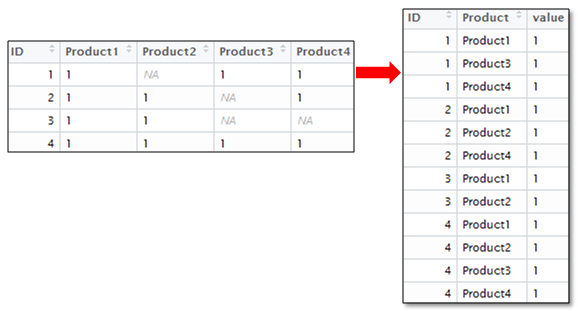

For performing the process on picture above, we can leverage `pandas` method `melt` it will allow us to convert our original data from a "wide" format, where the columns refer to years data into a "long" format table. Where rows will refer to years data.

In [17]:
df_l = pd.melt(df, id_vars=["Continent","Country Name", "Country Code","Series Name"],
              value_vars=list(df.columns)[4:]).\
                sort_values(by=["Continent","Country Name","Country Code","Series Name","value"])

df_l.head()

,Continent,Country Name,Country Code,Series Name,variable,value
1239,Asia,China,CHN,ARI treatment (% of children under 5 taken to ...,2000,..
12524,Asia,China,CHN,ARI treatment (% of children under 5 taken to ...,2001,..
23809,Asia,China,CHN,ARI treatment (% of children under 5 taken to ...,2002,..
35094,Asia,China,CHN,ARI treatment (% of children under 5 taken to ...,2003,..
46379,Asia,China,CHN,ARI treatment (% of children under 5 taken to ...,2004,..


In the cell below we:

+ Convert `dtype` of column `value` from `object` to `float`
+ Rename column `variable` to `Time`
+ Drop lines that does not contain data for column: `Series Name`

In [21]:
df_l.value = pd.to_numeric(df_l.value,errors='coerce')
df_l.rename(columns={'variable':'Time'},inplace=True)


In [24]:
df_l.dropna(subset=['Series Name'],inplace=True)

## 2. [Data in "wide" format](#II)
<a id="II"></a>
<br/>

When data is distributed along columns instead of lines we say that it is in a "wide" format.

Below we will use `pandas` `pivot_table` method to reformat our data and use the unique values of column `Series Name` as the columns of the new data.

In [26]:
df_panel = pd.pivot_table(df,values=list(df.columns)[4:],
                          index=["Continent","Country Name","Country Code"],
                         columns=["Series Name"],
                         aggfunc=np.sum,fill_value=np.nan).stack(0).reset_index().rename(columns={'level_3':'Year'})
df_panel

Series Name,Continent,Country Name,Country Code,Year,ARI treatment (% of children under 5 taken to a health provider),Access to electricity (% of population),Account ownership at a financial institution or with a mobile-money-service provider (% of population ages 15+),"Account ownership at a financial institution or with a mobile-money-service provider, female (% of population ages 15+)","Account ownership at a financial institution or with a mobile-money-service provider, male (% of population ages 15+)","Account ownership at a financial institution or with a mobile-money-service provider, older adults (% of population ages 25+)",...,Textiles and clothing (% of value added in manufacturing),Time required to enforce a contract (days),Time required to get electricity (days),"Time required to start a business, female (days)","Time required to start a business, male (days)",Total debt service (% of GNI),Total natural resources rents (% of GDP),Total reserves in months of imports,Trade (% of GDP),Trade in services (% of GDP)
0,Asia,China,CHN,2000,..,96.907104,..,..,..,..,...,11.223107,..,..,..,..,2.223718,2.522632,10.941359,39.410539,9.491611
1,Asia,China,CHN,2001,..,97.21814,..,..,..,..,...,11.170483,..,..,..,..,1.893645,2.544929,12.631757,38.527359,9.673467
2,Asia,China,CHN,2002,..,97.5149,..,..,..,..,...,10.644258,..,..,..,..,2.136201,1.889533,15.299233,42.747404,10.127435
3,Asia,China,CHN,2003,..,97.7929,..,..,..,..,...,10.604846,..,..,..,..,2.273981,2.092797,11.44274,51.803988,6.819611
4,Asia,China,CHN,2004,..,98.047676,..,..,..,..,...,10.432223,..,..,..,..,1.194966,4.859028,12.904401,59.505524,7.775605
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
814,South America,Colombia,COL,2016,..,98.4,..,..,..,..,...,8.094058,1288,109,11,11,5.663743,3.379802,8.555361,36.202653,6.743245
815,South America,Colombia,COL,2017,..,98.5,45.759228,42.47443,49.446972,49.633736,...,7.544615,1288,106,11,11,7.30689,4.193821,8.014444,35.282915,6.701095
816,South America,Colombia,COL,2018,..,99.936447,..,..,..,..,...,7.544615,1288,92,11,11,7.517085,5.513777,7.097109,36.561889,6.94236
817,South America,Colombia,COL,2019,..,..,..,..,..,..,...,..,1288,88,10,10,6.132622,..,7.720148,37.709093,7.372103


Finally, we can save the transformed tables into the `data` folder. Name the files 
+ WorldBankDataPanel.xlsx (wide)
+ WorldBankDataReshape.csv (long)

In [27]:
df_l.to_csv("data\\WorldBankDataReshape.csv",index=False)
df_panel.to_excel("data\\WorldBankDataPanel.xlsx",index=False)